# Starting Kit ~ Astrodatatón USM 2024
![](https://dataton.inf.utfsm.cl/codabench-media/starting_kit_image.png)
# Place the Dark on the Map
En este jupyter notebook proveemos a los participantes con un punto de partida para que puedan acceder a los datos, con el fin además de dar más claridad al problema a resolver durante la competencia.

## Imports básicos

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import glob

## Funciónes útiles

In [14]:
def plot_epsilon(epsilon) -> None:
    e1 = epsilon[0, :]
    e2 = epsilon[1, :]
    delta_e = epsilon[2, :]
    # Crear una figura con tres subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    vmin = min(e1.min(), e2.min(), delta_e.min())
    vmax = max(e1.max(), e2.max(), delta_e.max())

    # Mostrar cada imagen en su subplot correspondiente
    cmap = 'viridis'  # Colormap azul-blanco-rojo

    im1 = axs[0].imshow(e1, cmap=cmap, vmin=vmin, vmax=vmax)
    axs[0].set_title(r'$\epsilon_{1}$')

    im2 = axs[1].imshow(e2, cmap=cmap, vmin=vmin, vmax=vmax)
    axs[1].set_title(r'$\epsilon_{2}$')

    im3 = axs[2].imshow(delta_e, cmap=cmap, vmin=vmin, vmax=vmax)
    axs[2].set_title(r'$\Delta\epsilon$')

    # Añadir una barra de color
    cbar = fig.colorbar(im1, ax=axs, orientation='horizontal', fraction=0.02, pad=0.1)
    cbar.set_label(r'$\epsilon$')

    # Añadir un título global
    fig.suptitle('Imágenes de entrada para el problema', fontsize=16)

    # Mostrar la figura
    #plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def plot_kappa(kappa) -> None:
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    cmap = 'viridis'
    im = ax.imshow(kappa, cmap=cmap, vmin=kappa.min(), vmax=kappa.max())
    ax.set_title('Imágen de salida esperada para el problema')
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal', fraction=0.02, pad=0.1)
    cbar.set_label(r'$\kappa$')
    #plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


## Problema y Datos
El problema a resolver consiste en lograr generar los mapas de convergencia $\kappa$ a partir de las elipticidades $\epsilon_{1}$, $\epsilon_{2}$ y $\Delta\epsilon$ distorsionadas por el fenómeno de weak lensing. 

En otras palabras tenemos un input de 3 imágenes de 128x128 y un output deseado de una imágen de 128x128.
A continuación les mostramos como descargar los datos y una breve visualización de un caso ejemplo.

Los datos consisten de 8 conjuntos de entrenamiento, cada uno con un peso de alrededor de 10GB descomprimidos, y un conjunto de validación también de alrededor de 10GB descomprimido. Dependerá de ustedes si quieren usar todos los conjuntos de entrenamiento o solo algunos, pero deben tener en cuenta que no hay datos repetidos entre conjuntos, estos son completamente independientes entre sí.

Para descargar los datos podemos usar el comando wget con el link de descarg correspondiente al conjunto deseado, en este ejemplo descargaremos el conjunto de entrenamiento 1:

In [15]:
!wget https://descargas.inf.santiago.usm.cl/train/1.tar.gz

Luego de la descarga tendrán un archivo comprimido, el cual puede ser descomprimido desde la terminal con el siguiente comando:
```
tar -xf file.tar.gz
```
Esto generará una carpeta que contendrá dos carpetas, una llamada EPSILON que contiene las imágenes de input en formato numpy con precisión float16 y otra llamada KAPPA que tiene la respuesta esperada para cada imágen también en formato numpy con precisión float16.

A continuación descomprimimos el archivo de ejemplo:

In [16]:
!tar -xf 1.tar.gz

Luego podemos visualizar las imágenes cargandolas con numpy, para esto obtendremos la dirección de solo la primera imágen del conjunto 1.

In [17]:
dataset_number = 1

EP_pth = glob.glob(f"{dataset_number}/EPSILON/*.npy")[0]
KA_pth = glob.glob(f"{dataset_number}/KAPPA/*.npy")[0]

EP_pth, KA_pth

('1/EPSILON/00087_00323.npy', '1/KAPPA/00087_00323.npy')

Luego cargaremos y visualizaremos las imágenes:

Shape de imágen epsilon: (3, 128, 128)
Shape de imágen kappa: (128, 128)


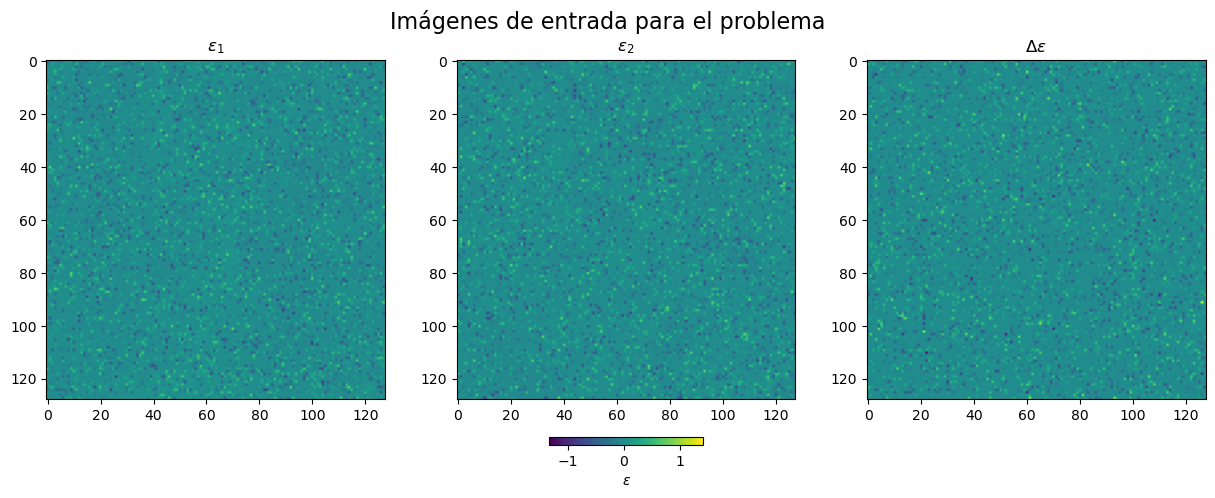

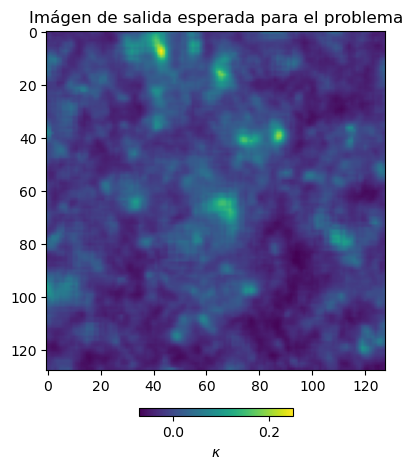

In [18]:
EP = np.load(EP_pth)
KA = np.load(KA_pth)

print(f"Shape de imágen epsilon: {EP.shape}")
print(f"Shape de imágen kappa: {KA.shape}")

plot_epsilon(EP)
plot_kappa(KA)

## Links de descarga
Para acceder a los datos existen 9 links en total, los 8 de entrenamiento y el de validación. 

A continuación se dejan los links en una lista para que tengan fácil acceso a ellos:
- Entrenamiento:
    1. https://descargas.inf.santiago.usm.cl/train/1.tar.gz
    2. https://descargas.inf.santiago.usm.cl/train/2.tar.gz
    3. https://descargas.inf.santiago.usm.cl/train/3.tar.gz
    4. https://descargas.inf.santiago.usm.cl/train/4.tar.gz
    5. https://descargas.inf.santiago.usm.cl/train/5.tar.gz
    6. https://descargas.inf.santiago.usm.cl/train/6.tar.gz
    7. https://descargas.inf.santiago.usm.cl/train/7.tar.gz
    8. https://descargas.inf.santiago.usm.cl/train/8.tar.gz
- Validación:
    - https://descargas.inf.santiago.usm.cl/test_public.tar.gz